# Python Part 3:  Pandas Example

### This notebook runs through an example using Pandas with the `jeopardy.csv` data.

**Data Source:**  200K+Jeopardy questions from [Reddit](https://www.reddit.com/r/datasets/comments/1uyd0t/200000_jeopardy_questions_in_a_json_file/)

---


## Part 1:  import libraries, check versions, set up preferences

In [1]:
# Python 2 & 3 Compatibility
from __future__ import print_function, division

In [2]:
# imports a library 'pandas', names it as 'pd'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Image

# enables inline plots, without it plots don't show up in the notebook
%matplotlib inline

In [3]:
# check version of libraries
print("Pandas version:",pd.__version__)
print("Numpy version:",np.__version__)

Pandas version: 0.20.1
Numpy version: 1.12.1


In [4]:
# confirming which version of Python I am using
import sys
print("Python Version:", sys.version)

Python Version: 3.6.1 |Anaconda 4.4.0 (64-bit)| (default, May 11 2017, 13:25:24) [MSC v.1900 64 bit (AMD64)]


In [5]:
# set various options in pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 25)
pd.set_option('display.precision', 3)

In [21]:
# check size of file; notice this is a bash command -- I can run it in the notebook!
#% lsmagic

!dir 

 Volume in drive C is Windows
 Volume Serial Number is CE1B-7F3F

 Directory of C:\Users\aj282_000\OneDrive\Metis\dsp\python\pandas

09/04/2017  02:17 PM    <DIR>          .
09/04/2017  02:17 PM    <DIR>          ..
09/04/2017  01:51 PM    <DIR>          .ipynb_checkpoints
09/04/2017  02:17 PM           101,077 1_pandas_jeopardy_example.ipynb
09/03/2017  02:41 PM            10,908 2_pandas_olive_questions.ipynb
09/03/2017  02:41 PM         1,651,525 jeopardy.csv
09/03/2017  02:41 PM            29,568 olive.csv
               4 File(s)      1,793,078 bytes
               3 Dir(s)  652,186,898,432 bytes free


## Part 2:  read in the data

In [22]:
# read csv data into pandas dataframe
df_orig = pd.read_csv('jeopardy.csv', encoding="ISO-8859-1")

# Note: I normally don't need to specify encoding.  
# But, when I read in this csv file, there was an error.  
# I googled it; there are some different unicode types.  I tried a bunch and this worked.  

# Data formatting is unpredictable, and one of the skills in data science is to 'google' 
# and see how to work through data issues

## Part 3:  look at data
`df` = dataframe being used.  In our case, it is `df_orig`
```python
df.shape()
df.info()
df.head()
df.tail()
df.columns
df.values
df.dtype
```

In [17]:
# check dimensions of dataframe
# (rows, colums)
df_orig.head()

,Show Number,Air Date,Round,Category,Value,Question,Answer
0,4680,12/31/04,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus
1,4680,12/31/04,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe
2,4680,12/31/04,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona
3,4680,12/31/04,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's
4,4680,12/31/04,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams


In [24]:
df_orig.head(3)

,Show Number,Air Date,Round,Category,Value,Question,Answer
0,4680,12/31/04,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus
1,4680,12/31/04,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe
2,4680,12/31/04,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona


## Part 4:  summarize data
```python
df.describe()
```

In [23]:
df_orig.describe()

,Show Number
count,10999.000
mean,4308.181
std,1397.758
min,62.000
25%,3409.000
50%,4541.000
75%,5431.000
max,6294.000


In [25]:
df_orig['Round'].describe()

count         10999
unique            3
top       Jeopardy!
freq           5434
Name: Round, dtype: object

In [26]:
# print the unique values of the column 'Round'
df_orig['Round'].unique()

array(['Jeopardy!', 'Double Jeopardy!', 'Final Jeopardy!'], dtype=object)

In [27]:
df_orig.groupby('Round').count()

,Show Number,Air Date,Category,Value,Question,Answer
Round,,,,,,
Double Jeopardy!,5382,5382,5382,5382,5382,5382
Final Jeopardy!,183,183,183,183,183,183
Jeopardy!,5434,5434,5434,5434,5434,5434


## Part 5:  create a new column

In [28]:
df_orig['Dollar_Amt'] = df_orig['Value']

## Part 6:  clean data

In [29]:
# remove the '$' in the column Dollar_Amt
df_orig['Dollar_Amt'].replace(regex=True,inplace=True,to_replace=r'\$',value=r'')

df_orig.head(3)

,Show Number,Air Date,Round,Category,Value,Question,Answer,Dollar_Amt
0,4680,12/31/04,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus,200
1,4680,12/31/04,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe,200
2,4680,12/31/04,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona,200


In [30]:
# let's look at the tail end of the data
df_orig.tail(5)

,Show Number,Air Date,Round,Category,Value,Question,Answer,Dollar_Amt
10994,4362,7/15/03,Double Jeopardy!,BEFORE & AFTER,"$1,200","Liberator & king of Scotland who starred in ""D...",Robert the Bruce Willis,"1,200"
10995,4362,7/15/03,Double Jeopardy!,PEN NAMES,"$2,000","This pseudonym means ""2 fathoms deep""",Mark Twain,"2,000"
10996,4362,7/15/03,Double Jeopardy!,TELEVISION,"$1,600","She's the ""Night Court"" actress seen here",Markie Post,"1,600"
10997,4362,7/15/03,Double Jeopardy!,INVENTIVE MINDS,"$1,600",In 1952 he & Charles Bowman joined forces to d...,Orville Redenbacher,"1,600"
10998,4362,7/15/03,Double Jeopardy!,REFRESHER COURSE,"$1,600","Lemon juice, sugar, gin, club soda & an egg go...",royal gin fizz,"1,600"


In [31]:
# we need to do more cleaning.  There is a comma in the dollar amount
# remove the commas in the column 'Dollar_Amt'
# there are many ways to do it.  here's one:
df_orig['Dollar_Amt'] = df_orig['Dollar_Amt'].str.replace(',', '')
df_orig.tail(2)

,Show Number,Air Date,Round,Category,Value,Question,Answer,Dollar_Amt
10997,4362,7/15/03,Double Jeopardy!,INVENTIVE MINDS,"$1,600",In 1952 he & Charles Bowman joined forces to d...,Orville Redenbacher,1600
10998,4362,7/15/03,Double Jeopardy!,REFRESHER COURSE,"$1,600","Lemon juice, sugar, gin, club soda & an egg go...",royal gin fizz,1600


In [32]:
# create a new column which we want to be numeric
df_orig['Dollar_Amt_n'] = df_orig['Dollar_Amt']

In [33]:
# check data types
df_orig.dtypes

Show Number      int64
Air Date        object
Round           object
Category        object
Value           object
Question        object
Answer          object
Dollar_Amt      object
Dollar_Amt_n    object
dtype: object

In [34]:
df_orig['Dollar_Amt_n'].describe()

count     10999
unique       52
top         400
freq       2144
Name: Dollar_Amt_n, dtype: object

In [35]:
df_orig['Dollar_Amt_n'].unique()

array(['200', '400', '600', '800', '2000', '1000', '1200', '1600', '3200',
       'None', '5000', '100', '300', '500', '1500', '4800', '1800', '1100',
       '2200', '3400', '3000', '4000', '6800', '1900', '3100', '700',
       '1400', '2800', '8000', '6000', '2400', '12000', '3800', '2500',
       '6200', '10000', '7000', '1492', '7400', '1300', '7200', '2600',
       '3300', '5400', '4500', '2100', '900', '3600', '2127', '367',
       '4400', '3500'], dtype=object)

## Part 7:  change data type

In [36]:
df_orig['Dollar_Amt_n'] = pd.to_numeric(df_orig['Dollar_Amt_n'], errors='coerce')

In [37]:
df_orig['Dollar_Amt_n'].unique()

array([   200.,    400.,    600.,    800.,   2000.,   1000.,   1200.,
         1600.,   3200.,     nan,   5000.,    100.,    300.,    500.,
         1500.,   4800.,   1800.,   1100.,   2200.,   3400.,   3000.,
         4000.,   6800.,   1900.,   3100.,    700.,   1400.,   2800.,
         8000.,   6000.,   2400.,  12000.,   3800.,   2500.,   6200.,
        10000.,   7000.,   1492.,   7400.,   1300.,   7200.,   2600.,
         3300.,   5400.,   4500.,   2100.,    900.,   3600.,   2127.,
          367.,   4400.,   3500.])

In [38]:
# check data types
df_orig.dtypes

# notice Dollar_Amt_n is now type float64

Show Number       int64
Air Date         object
Round            object
Category         object
Value            object
Question         object
Answer           object
Dollar_Amt       object
Dollar_Amt_n    float64
dtype: object

In [39]:
# notice now we see summary statistics (rather than frequency counts for string data)
df_orig['Dollar_Amt_n'].describe()

count    10816.000
mean       761.001
std        643.154
min        100.000
25%        400.000
50%        600.000
75%       1000.000
max      12000.000
Name: Dollar_Amt_n, dtype: float64

## Part 8:  visualize data

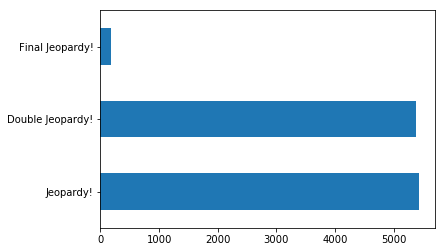

In [40]:
# do barplot of a categorical variable
df_orig['Round'].value_counts().plot('barh')

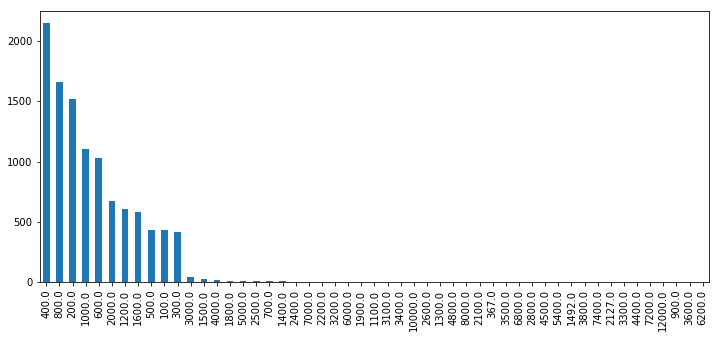

In [41]:
# do barplot of a numerical variable
fig = plt.figure(figsize=(12,5))

df_orig['Dollar_Amt_n'].value_counts().plot('bar')

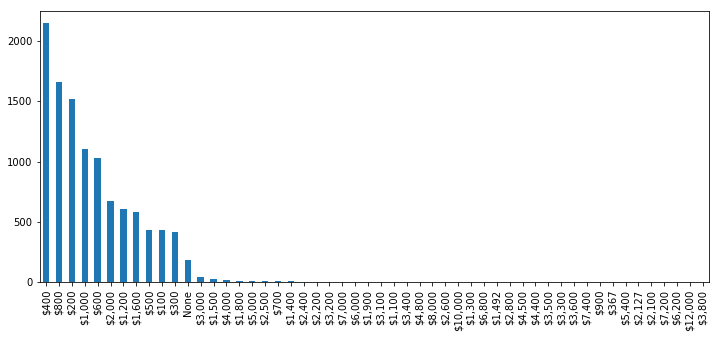

In [42]:
# do barplot of a categorical variable
fig = plt.figure(figsize=(12,5))

df_orig['Value'].value_counts().plot('bar')